In [6]:
import random

import librosa
import librosa.display

import sounddevice as sd

%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
def docker_dir_to_my_dir(path):    
    segments = path.split("/")
    csj_path = "/".join(segments[-3:])
    # Change this to your local directory
    my_path = f"/home/keisuke26/Documents/Chief/Datasets/CSJ/{csj_path}"
    return my_path

def load_audio(path_to_tsv: str):
    with open(path_to_tsv, "r") as f:
        lines = f.readlines()
        num_lines = len(lines)
        target_line = lines[random.randint(0, num_lines-1)]
        
        path, transcript, duration, offset = target_line.split("\t")
        path = docker_dir_to_my_dir(path)
        wave, rate = librosa.load(
            path,
            sr=16000,
            mono=True,
            duration=float(duration),
            offset=float(offset),
        )

    return (wave, rate), transcript



In [8]:
(wave, rate), transcript = load_audio("/home/keisuke26/Documents/Chief/Datasets/CSJ/csj_train.tsv")

print(f"🏹 Target transcript:\n", transcript)

sd.play(wave, rate)

🏹 Target transcript:
 まーそういうようなつこれで終わります


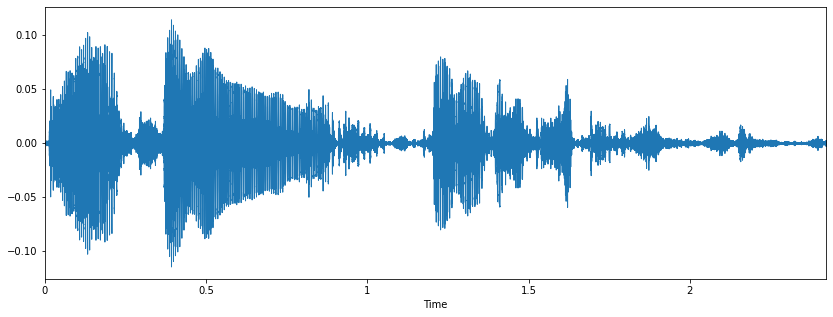

In [9]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(wave, sr=rate)